## Regression Analysis : First Machine Learning Algorithm !!

### Machine learning 
- is an application of artificial intelligence (AI) that provides systems the __ability to automatically learn and improve from experience without being explicitly programmed__.

<img style="float: left;" src = "./img/ml_definition.png" width="600" height="600">

<img style="float: left;" src = "./img/traditionalVsml.png" width="600" height="600">

### Types of Machine Learning

<img style="float: left;" src = "./img/types-ml.png" width="700" height="600">

<br>
<br>

<img style="float: left;" src = "./img/ml-ex.png" width="800" height="700">

__Why use linear regression?__

1. Easy to use
2. Easy to interpret
3. Basis for many methods
4. Runs fast
5. Most people have heard about it :-) 

### Libraries in Python for Linear Regression

The two most popular ones are

1. `scikit-learn`
2. `statsmodels`

Highly recommend learning `scikit-learn` since that's also the machine learning package in Python.

### Linear regression 

Let's use `scikit-lean` for this example. 

Linear regression is of the form:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is what we have to predict/independent variable/response variable
- $\beta_0$ is the intercept/slope
- $\beta_1$ is the coefficient for $x_1$ (the first feature/dependent variable)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature/dependent variable)

The $\beta$ are called *model coefficients*

The model coefficients are estimated in this process. (In Machine Learning parlance - the weights are learned using the algorithm). The objective function is least squares method. 
<br>

**Least Squares Method** : To identify the weights so that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation. [Wiki](https://en.wikipedia.org/wiki/Least_squares)

<img style="float: left;" src = "./img/lin_reg.jpg" width="600" height="600">

<h2> Model Building & Testing Methodology </h2>
<img src="./img/train_test.png" alt="Train & Test Methodology" width="700" height="600">
<br>
<br>
<br>

### Must read blog:
Interpretable Machine Learning by Christoph
https://christophm.github.io/interpretable-ml-book/intro.html

In [1]:
# Step1: Import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# Step2:  Load our data
df = pd.read_csv('./data/Mall_Customers.csv')
df.rename(columns={'CustomerID':'id','Spending Score (1-100)':'score','Annual Income (k$)':'income'},inplace=True)
df.head() # Visualize first 5 rows of data
df.tail()

,id,Gender,Age,income,score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [3]:
# Step3: Feature Engineering - transforming variables as appropriate for inputs to Machine Learning Algorithm
# transforming categorical variable Gender using One hot encodding
gender_onhot = pd.get_dummies(df['Gender'])
gender_onhot.tail()

,Female,Male
195,1,0
196,1,0
197,0,1
198,0,1
199,0,1


In [4]:
# Create input dataset aka X
X = pd.merge(df[['Age','income']], gender_onhot, left_index=True, right_index=True)
X.head()

,Age,income,Female,Male
0,19,15,0,1
1,21,15,0,1
2,20,16,1,0
3,23,16,1,0
4,31,17,1,0


Correlation between variables.........


,Age,income,Female,Male
Age,1.000000,-0.012398,-0.060867,0.060867
income,-0.012398,1.000000,-0.056410,0.056410
Female,-0.060867,-0.056410,1.000000,-1.000000
Male,0.060867,0.056410,-1.000000,1.000000


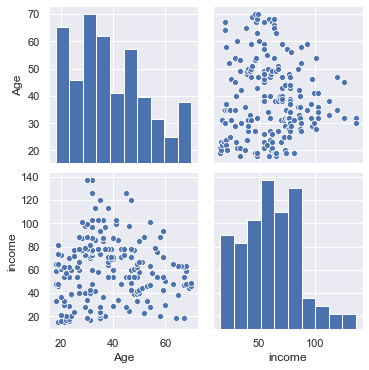

In [5]:
sns.pairplot(X[['Age','income']])
print("Correlation between variables.........")
X.iloc[:,:4].corr()

In [6]:
# Create target variable
Y = df['score']
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: score, dtype: int64

In [7]:
# Step3: Split data in train & test set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state = 40)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(160, 4)
Shape of Test Xs:(40, 4)


In [8]:
# Step4: Build Linear Regression Analysis Model
learner = LinearRegression(); #initializing linear regression model

learner.fit(X_train,y_train); #training the linear regression model
y_predicted = learner.predict(X_test)
score=learner.score(X_test,y_test);#testing the linear regression model

### Interpretation

__Score__: R^2 (pronounced as R Square) it is also called as __coefficient of determination__ of prediction.

__Range of Score values__: 0 to 1 , 0 -> No relation between predicted Y and input Xs, 1 -> best case scenario where predicted value is same as actual value.
__Formula for Score__: R^2 = (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

In [9]:
print(score)
print(y_predicted)

0.13225553640313015
[46.41347257 58.62727546 37.53264231 59.95303968 58.46554531 42.18281203
 43.90082864 60.20571996 34.40007944 56.99232949 53.91272477 57.9959337
 56.92570548 46.04121013 44.60952962 41.4240086  56.30864225 51.66989536
 59.51639625 54.87193795 49.61544021 48.93753934 43.35317018 50.40218804
 44.8872986  55.88913307 39.60925549 61.32319491 51.87254815 44.72618112
 59.45548366 43.75908844 53.95711579 54.02937627 51.31415449 48.28396458
 49.05133513 62.51007464 33.88036538 55.76391445]


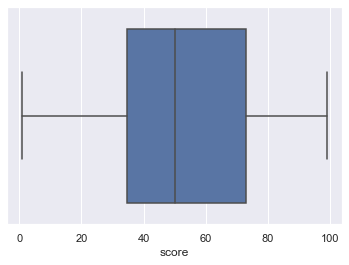

In [10]:
sns.boxplot(x = df['score'])

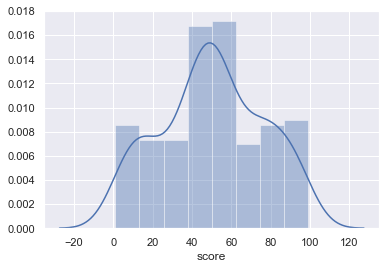

In [11]:
sns.distplot(df['score'])

In [12]:
# Step5: Check Accuracy of Model
df_new = pd.DataFrame({"true_score":y_test,"predicted_score":y_predicted})
df_new

,true_score,predicted_score
96,47,46.413473
5,76,58.627275
116,43,37.532642
35,81,59.953040
183,88,58.465545
160,35,42.182812
54,45,43.900829
134,5,60.205720
90,55,34.400079
191,69,56.992329


In [13]:
# Step6: Diagnostic analysis
from sklearn.metrics import mean_squared_error, r2_score
print("Intercept is at: %.2f"%(learner.intercept_))
# The coefficients
print('Coefficients: \n', learner.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_test, y_predicted))

Intercept is at: 69.26
Coefficients: 
 [-0.5698165   0.04724673  1.10350275 -1.10350275]
Mean squared error: 499.08
Variance score: 0.1323
